In [1]:

import sys
import pandas as pd
sys.path.append(r'C:\Users\clima\Desktop\Aptamers\my_seqfold')
from fold import fold, my_fold, dot_bracket
sys.path.append(r'C:\Users\clima\Desktop\Aptamers\src')
import numpy as np
from APTamers import  Aptamer_Fold
from tqdm import tqdm
import forgi.visual.mplotlib as fvm
import forgi
from forgi.graph.bulge_graph import BulgeGraph
import matplotlib.pyplot as plt
from minimization import ty_fold
from energy_functions import _hairpin, _stack, _bulge, _internal_loop, _multi_branch, compute_energy
import time



df = pd.read_csv(r'C:\Users\clima\Desktop\Aptamers\data\preprocessed _files\UNAfold_merged_all.csv')
print('Numeber sequences after merge:',len(df))
df = df.drop_duplicates(subset='Sequence')
print('Numeber of unique sequences after preprocessing:',len(df))

Numeber sequences after merge: 4933
Numeber of unique sequences after preprocessing: 4933


In [2]:
APT = Aptamer_Fold(parallel = False)
d,l = APT.fit_fold( sequence=df['Sequence'][0] ,  n_tmpl=4, l_fix= 0 , filters = False)

TypeError: cannot unpack non-iterable NoneType object

[(21, 39), (29, 39), (33, 41), (19, 38), (11, 21)]
[(21, 39), (29, 39)]
inf
[(21, 39), (33, 41)]
inf
[(21, 39), (19, 38)]
inf
[(21, 39), (11, 21)]
inf
[(29, 39), (33, 41)]
inf
[(29, 39), (19, 38)]
inf
[(29, 39), (11, 21)]
2.297679999999994
[(33, 41), (19, 38)]
inf
[(33, 41), (11, 21)]
2.0715549999999956
[(19, 38), (11, 21)]
inf
[(21, 39), (29, 39), (33, 41)]
inf
[(21, 39), (29, 39), (19, 38)]
inf
[(21, 39), (29, 39), (11, 21)]
inf
[(21, 39), (33, 41), (19, 38)]
inf
[(21, 39), (33, 41), (11, 21)]
inf
[(21, 39), (19, 38), (11, 21)]
inf
[(29, 39), (33, 41), (19, 38)]
inf
[(29, 39), (33, 41), (11, 21)]
inf
[(29, 39), (19, 38), (11, 21)]
inf
[(33, 41), (19, 38), (11, 21)]
inf
eee BIFURCATION:16n/3h [(11, 21), (33, 41)] <bound method Struct.with_ij of <minimization.Struct object at 0x0000022548A76000>> 2.0715549999999956


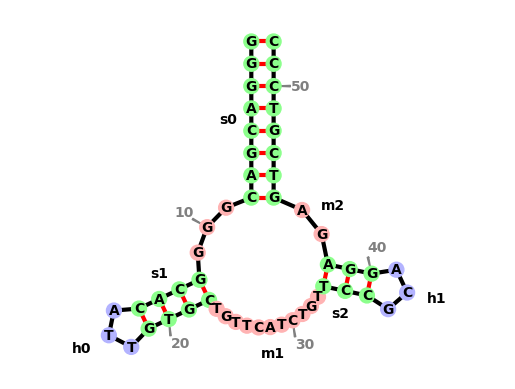

In [2]:
i=0
structs = ty_fold(df['Sequence'][i])
d_b = dot_bracket( df['Sequence'][i], structs)
bg = BulgeGraph.from_dotbracket( d_b  ,  df['Sequence'][i])
fvm.plot_rna(bg, text_kwargs={"fontweight":"black"}, lighten=0.7,backbone_kwargs={"linewidth":3})
plt.show()

In [7]:
summ = 0
for s in  structs1:
    summ += s.e
summ

-9.000000000000004

In [5]:
df['Sequence'][0]

'GGGACGACGGGGCACATTGTGCTGTTCATCTGTTCCGCAGGAGAGTCGTCCC'

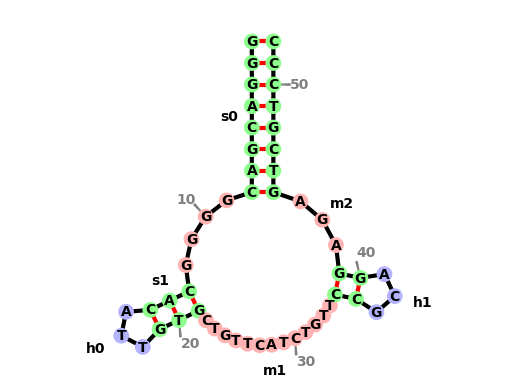

In [6]:
i=0
structs1 = fold(df['Sequence'][i])
d_b = dot_bracket( df['Sequence'][i], structs1)
bg = BulgeGraph.from_dotbracket( d_b  ,  df['Sequence'][i])
fvm.plot_rna(bg, text_kwargs={"fontweight":"black"}, lighten=0.7,backbone_kwargs={"linewidth":3})
plt.show()

In [2]:
times = []
structures = []
for count, seq in  tqdm(enumerate(df['Sequence'])):
    start_time = time.time()
    structs = fold(seq)
    times.append(time.time()-start_time)
    structures.append(structs)
    if count == 100:
        break
'''
d_b = dot_bracket( df['Sequence'][i], structs)
bg = BulgeGraph.from_dotbracket( d_b  ,  df['Sequence'][i])
fvm.plot_rna(bg, text_kwargs={"fontweight":"black"}, lighten=0.7,backbone_kwargs={"linewidth":3})
plt.show()
'''
print(sum(times))

100it [00:31,  3.22it/s]

31.01815438270569


In [5]:
my_times = []
my_structures = []
for count, seq in  tqdm(enumerate(df['Sequence'])):
        start_time = time.time()
        structs = my_fold(seq)
        my_times.append(time.time()-start_time)
        my_structures.append(structs)
        if count == 100:
            break
print(sum(my_times))

100it [00:31,  3.14it/s]

31.765604257583618


In [3]:
'({}, {})'.format(*(1,2))

'(1, 2)'

In [ ]:
np.sum(my_times)

33.84689688682556

In [ ]:
i = 0
my_structs = my_fold( df['Sequence'][i])
myd_b = dot_bracket( df['Sequence'][i], my_structs)
bg = BulgeGraph.from_dotbracket( myd_b  ,  df['Sequence'][i])
fvm.plot_rna(bg, text_kwargs={"fontweight":"black"}, lighten=0.7,backbone_kwargs={"linewidth":3})
plt.show()

TypeError: unsupported operand type(s) for -: 'list' and 'int'